# BUSINESS PROBLEM UNDERSTANDING

** CREATE A PREDICITVE MODEL,WHICH CAN PREDICT WHETHER THE PERSON IS DIABETIC OR NOT

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter('ignore')

In [7]:
df = pd.read_excel(r"D:\Jupyter\Data Science\ML\SUPERVISIED LEARNING\CLASSIFICATION\projects\cleandiabetic.xlsx")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,89,66,23,4.546836,28.1,0.408656,2.140695,0
1,0,137,40,35,5.517848,43.1,1.512614,2.396782,1
2,3,78,50,32,4.447960,31.0,0.497996,2.258101,1
3,2,197,70,45,8.158305,30.5,0.397492,2.698168,1
4,1,189,60,23,9.457800,30.1,0.630872,2.771488,1


In [8]:
X = df.drop('Outcome',axis=1)
y = df['Outcome']

- Train|Test Split

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=3)

- trainsize = 768*0.8 = 614 records
- test size = 768*0.2 = 154 records

# MODELLING
**Logistic Regression(Baseline model)

In [18]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)


LogisticRegression()

# Evalution
**train**

In [19]:
ypred_train = log_reg.predict(X_train)

# train accuarcy
from sklearn.metrics import accuracy_score
print('train accuracy',accuracy_score(y_train,ypred_train))

# crossvalidation score
from sklearn.model_selection import cross_val_score
print('cvscore',cross_val_score(log_reg,X_train,y_train,cv=5,scoring ='accuracy').mean())

train accuracy 0.7539936102236422
cvscore 0.7569380440348181


**test**

In [20]:
ypred_test = log_reg.predict(X_test)
print('testaccuracy',accuracy_score(y_test,ypred_test))

testaccuracy 0.8227848101265823


**confusion matrix**

In [21]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,ypred_test)
cm

array([[52,  5],
       [ 9, 13]], dtype=int64)

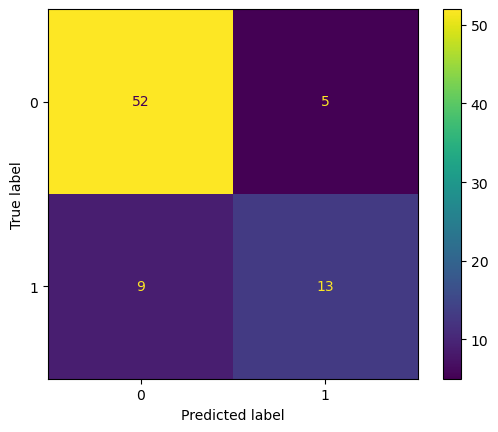

In [22]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(cm,display_labels = df['Outcome'].unique()).plot()
plt.show()

**classification Report** 

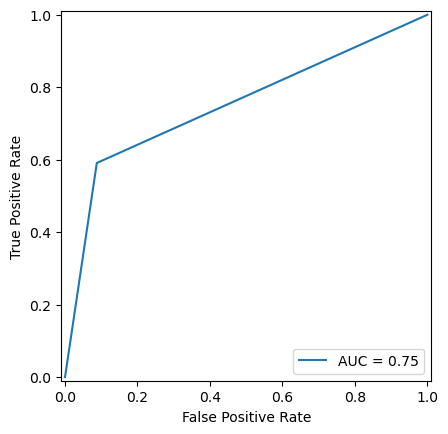

In [23]:
from sklearn.metrics import roc_curve,auc,RocCurveDisplay

fpr,tpr,thresholds = roc_curve(y_test,ypred_test)
roc_auc = auc(fpr,tpr)
RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc).plot()
plt.show()

**AUC SCORE**

In [24]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,ypred_test)

0.7515948963317384